In [45]:
import GCRCatalogs
from clevar import ClCatalog, MemCatalog
import clevar
clevar.__version__

'0.13.5'

In [46]:
from matplotlib import pyplot as plt
import matplotlib 

matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'figure.figsize': (10,8)})

In [47]:
import sys
sys.path.append('../')
from cluster_validation.opening_catalogs_functions import *

In [48]:
import GCRCatalogs
from matplotlib import pyplot as plt
import matplotlib 

matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'figure.figsize': (10,8)})

# 1 - Creating and saving catalogs

In [49]:
min_richness = 5
min_halo_mass = 1e13 #Msun

In [9]:
RM_cat_name = 'cosmoDC2_v1.1.4_redmapper_v0.8.1'
DC2_cat_name ='cosmoDC2_v1.1.4_image'        

cluster_data, member_data, truth_data, gc, gc_truth = RM_DC2_cat_open(RM_cat_name, DC2_cat_name,\
                                                                      min_richness, min_halo_mass,\
                                                                      cluster_only=False, mag_query=True, RM_only=False)

### - cluster catalog

In [10]:
cluster_data.columns

<TableColumns names=('redshift_err','id_cen_0','id_cen_2','cluster_id','p_cen_1','ra_cen_3','dec_cen_2','redshift_true_cg','dec_cen_4','maskfrac','id_cen_3','ra_cen_2','ra_cen_0','p_cen_3','ra','p_cen_0','p_cen_4','dec_cen_3','richness','richness_err','dec_cen_1','dec','ra_cen_4','scaleval','dec_cen_0','p_cen_2','redshift','ra_cen_1','id_cen_4','id_cen_1')>

In [19]:
RM_cat = ClCatalog(RM_cat_name, z=cluster_data["redshift"], ra=cluster_data["ra"], dec=cluster_data["dec"], id = cluster_data["cluster_id"], richness = cluster_data["richness"], richness_err=cluster_data["richness_err"], \
                   id_cg = cluster_data["id_cen_0"], ztrue_cg=cluster_data["redshift_true_cg"], p_cg_0=cluster_data["p_cen_0"])

In [20]:
display(RM_cat)

id,z,ra,dec,richness,richness_err,id_cg,ztrue_cg,p_cg_0,mt_self,mt_other,mt_multi_self,mt_multi_other
str11,float32,float64,float64,float32,float32,int64,float32,float32,object,object,object,object
10,0.5135129,52.520436430812914,-25.717996124671657,190.70665,3.7469666,1312945563,0.51072353,0.79138356,None,None,[],[]
18,0.5712697,56.920376528125075,-27.20434071042304,179.12813,3.6934361,2000524808,0.5740297,0.99996513,None,None,[],[]
24,1.040338,56.99849698116052,-26.7172081871169,124.02715,2.4172914,2002535198,1.0347759,0.93527913,None,None,[],[]
30,0.63518524,58.56362402841767,-27.429961828331713,167.33603,3.6777163,2000759779,0.6426174,0.9958548,None,None,[],[]
71,0.44230303,58.35519782866568,-26.867687128773035,111.9147,3.366554,2000289335,0.43919736,0.7297119,None,None,[],[]
73,0.46697217,57.76575707007693,-28.119101936484828,104.439766,2.9570596,2000290819,0.4680865,0.99970347,None,None,[],[]
109,0.4413634,58.509466974185045,-26.989676182075844,103.49396,3.3524604,2000286447,0.44349608,0.99999905,None,None,[],[]
116,1.0629631,54.494027152041674,-27.896589555863095,76.85877,2.2175314,1940324795,1.0758829,0.6544826,None,None,[],[]
133,1.037697,58.137368555958155,-27.199784884537003,75.89771,2.26323,2002528355,1.0311339,0.991116,None,None,[],[]


In [21]:
RM_cat.write('RM_cat_richness_min_'+str(min_richness)+'.fits', add_header =True, overwrite=True)

### - cluster member catalog

In [22]:
# this quantity describe the probability to be a member

pmem = member_data["p_member"] * member_data["pfree_member"] * member_data["theta_i_member"] * member_data["theta_r_member"] 

member_data.add_column(pmem, name="pmem")

In [23]:
member_data.columns

<TableColumns names=('theta_i_member','mag_r_lsst_member','refmag_member','redshift_true_member','cluster_id_member','magerr_z_lsst_member','mag_g_lsst_member','id_member','ra_member','pfree_member','p_member','refmag_err_member','magerr_y_lsst_member','magerr_g_lsst_member','magerr_r_lsst_member','mag_y_lsst_member','dec_member','mag_i_lsst_member','theta_r_member','magerr_i_lsst_member','mag_z_lsst_member','pmem')>

In [24]:
RM_cat_members = MemCatalog("RM_members", id_cluster=member_data["cluster_id_member"], id=member_data["id_member"], ra=member_data["ra_member"], dec=member_data["dec_member"],
                            pmem=member_data["pmem"],  redshift=member_data["redshift_true_member"], 
                            mag_g_lsst_member=member_data["mag_g_lsst_member"], mag_r_lsst_member=member_data["mag_r_lsst_member"], 
                            mag_i_lsst_member=member_data["mag_i_lsst_member"], mag_z_lsst_member=member_data["mag_z_lsst_member"], mag_y_lsst_member=member_data["mag_y_lsst_member"]) 

In [25]:
RM_cat.add_members(members_catalog=RM_cat_members)

In [26]:
display(RM_cat.members)

id,id_cluster,ra,dec,pmem,redshift,mag_g_lsst_member,mag_r_lsst_member,mag_i_lsst_member,mag_z_lsst_member,mag_y_lsst_member,ind_cl
str21,str11,float64,float64,float32,float32,float32,float32,float32,float32,float32,int64
1312945563,10,52.520436430812914,-25.717996124671657,0.99583477,0.51072353,20.286411,18.798338,17.89911,17.505138,17.322586,0
1312932492,10,52.519490104517175,-25.71783277825776,0.9876479,0.5130878,20.368668,18.879597,18.05471,17.676914,17.482,0
1312932655,10,52.518707152418855,-25.71750114716764,0.9697444,0.523674,22.91745,21.444391,20.486027,20.064653,19.879288,0
1312946401,10,52.518979242173025,-25.71690396971558,0.99689674,0.51073974,23.4083,21.914343,21.0543,20.635675,20.473616,0
1312946359,10,52.52323890490535,-25.71709733763848,0.99600416,0.5105011,22.737461,21.228529,20.303442,19.94585,19.697416,0
1312932712,10,52.51752041591883,-25.717318002826303,0.9944089,0.51873726,22.236683,20.697811,19.791677,19.392906,19.213097,0
1312945743,10,52.522204954216015,-25.715387727740318,0.96740067,0.5103931,22.867363,21.282442,20.382519,19.967947,19.805065,0
1312932517,10,52.52449873444964,-25.717773366108503,0.99410915,0.50992316,23.20681,21.730125,20.830225,20.387508,20.161732,0
1312946270,10,52.51641230513422,-25.718985813309068,0.9976963,0.51228535,22.93172,21.42707,20.537926,20.15959,19.981861,0


In [27]:
RM_cat.members.write('RM_cat_richness_min_'+str(min_richness)+'_members.fits', overwrite=True)

### - halo catalog

In [29]:
halo_cat = ClCatalog(DC2_cat_name, z= truth_data["redshift"][truth_data["is_central"]],
                     ra= truth_data["ra"][truth_data["is_central"]], dec= truth_data["dec"][truth_data["is_central"]],
                     id=truth_data["halo_id"][truth_data["is_central"]], mass_fof=truth_data["halo_mass"][truth_data["is_central"]])

In [30]:
display(halo_cat)

id,z,ra,dec,mass_fof,mt_self,mt_other,mt_multi_self,mt_multi_other
str21,float64,float64,float64,float64,object,object,object,object
4500151475,0.04818676962281132,49.6366034309591,-40.400894272468605,16891355712901.41,None,None,[],[]
7300151475,0.04825926322238838,50.957598308861314,-41.3447799174979,74621860826501.4,None,None,[],[]
13700151475,0.04554516035339984,51.00887984172898,-40.832338501224754,33506664194163.383,None,None,[],[]
1100151464,0.0643846735498792,50.57641425057562,-41.15855360868742,17911434075583.098,None,None,[],[]
18300151442,0.10736840205357634,50.77601162448169,-39.168679326038024,13042641686354.93,None,None,[],[]
36400151442,0.12743613052494784,50.60510200022939,-39.336294511446724,48388878878287.33,None,None,[],[]
43700151442,0.11375834498747261,49.50475455575477,-40.23977306100707,69213477135143.664,None,None,[],[]
52300151442,0.1259639067546261,51.070122482361214,-39.64548257286864,62974036412214.086,None,None,[],[]
1200151432,0.12775858760889358,50.36982165635327,-39.09754001831282,34125997485791.55,None,None,[],[]


In [31]:
halo_cat.write('halo_cat_mass_min_'+ f"{min_halo_mass:1.2e}"+'.fits', overwrite=True)

### - halo members catalog

In [32]:
halo_cat_members = MemCatalog("halo_members", id_cluster=truth_data["halo_id"], id=truth_data["galaxy_id"], ra=truth_data["ra"], dec=truth_data["dec"],
                              redshift=truth_data["redshift"], is_central = truth_data["is_central"], 
                              mag_true_u_lsst = truth_data["mag_true_u_lsst"],  mag_true_g_lsst = truth_data["mag_true_g_lsst"],
                              mag_true_r_lsst = truth_data["mag_true_r_lsst"], mag_true_i_lsst = truth_data["mag_true_i_lsst"],  mag_true_z_lsst = truth_data["mag_true_z_lsst"], ) 

In [33]:
halo_cat.add_members(members_catalog=halo_cat_members)

/pbs/throng/lsst/users/mricci/desc/my_clean_env/lib/python3.8/site-packages/clevar-0.13.4-py3.8.egg/clevar/catalog.py:1032: UserWarning: Some galaxies were not members of the cluster catalog. They are stored in leftover_members attribute.
  warnings.warn(


In [34]:
halo_cat.members.write('halo_cat_mass_min_'+f"{min_halo_mass:1.2e}"+'_members.fits', overwrite=True)

In [35]:
halo_cat.members

id,id_cluster,ra,dec,redshift,is_central,mag_true_u_lsst,mag_true_g_lsst,mag_true_r_lsst,mag_true_i_lsst,mag_true_z_lsst,ind_cl
str21,str21,float64,float64,float64,bool,float32,float32,float32,float32,float32,int64
9437500128,4500151475,49.6366034309591,-40.400894272468605,0.04818676962281132,True,17.104242,15.427202,14.594372,14.220104,13.957041,0
9437500129,4500151475,49.46521866823849,-40.41371737691802,0.04920109901409253,False,22.25664,21.199564,20.71225,20.43797,20.297253,0
9437500130,4500151475,49.62952487674635,-40.40525333868696,0.04825475916728461,False,17.41775,15.811033,15.01067,14.648596,14.410269,0
9437500131,4500151475,49.63722268629932,-40.40213407288883,0.04908434162264519,False,20.77637,19.294384,18.560036,18.194801,17.962835,0
9437500132,4500151475,49.47215142449812,-40.40661788509503,0.04715899608329677,False,20.729671,19.474966,19.085833,18.89763,18.833975,0
9437500133,4500151475,49.62774364073635,-40.389274415076976,0.04834164860201673,False,22.528042,21.259693,20.748756,20.500061,20.401487,0
9437500134,4500151475,49.7276378027726,-40.383940630337435,0.04834778668489825,False,19.053247,17.43881,16.642687,16.257164,16.007717,0
9437500135,4500151475,49.698541467041395,-40.27724451449116,0.04829776417102405,False,18.213757,17.159548,16.622149,16.261654,15.996252,0
9437500136,4500151475,49.718255793095075,-40.54445769390596,0.04739776740602353,False,22.01182,20.756655,20.328505,20.129255,20.065802,0


# 2 - opening catalogs

### - halo and cluster catalogs

In [50]:
RM_cat = ClCatalog.read('RM_cat_richness_min_'+str(min_richness)+'.fits', name='RM_cat', full=True, tags={'mass':'richness'})

In [51]:
halo_cat = ClCatalog.read('halo_cat_mass_min_'+f"{min_halo_mass:1.2e}"+'.fits', name='halo_cat', full=True, tags={'mass':'mass_fof'})

### - member catalogs

In [21]:
RM_cat.read_members('RM_cat_richness_min_'+str(min_richness)+'_members.fits',  full=True)

In [22]:
halo_cat.read_members('halo_cat_mass_min_'+f"{min_halo_mass:1.2e}"+'_members.fits', full=True)

In [23]:
RM_cat

id,z,ra,dec,richness (mass),richness_err,id_cg,ztrue_cg,p_cg_0,mt_self,mt_other,mt_multi_self,mt_multi_other
str11,float32,float64,float64,float32,float32,int64,float32,float32,object,object,object,object
10,0.5135129,52.520436430812914,-25.717996124671657,190.70665,3.7469666,1312945563,0.51072353,0.79138356,None,None,[],[]
18,0.5712697,56.920376528125075,-27.20434071042304,179.12813,3.6934361,2000524808,0.5740297,0.99996513,None,None,[],[]
24,1.040338,56.99849698116052,-26.7172081871169,124.02715,2.4172914,2002535198,1.0347759,0.93527913,None,None,[],[]
30,0.63518524,58.56362402841767,-27.429961828331713,167.33603,3.6777163,2000759779,0.6426174,0.9958548,None,None,[],[]
71,0.44230303,58.35519782866568,-26.867687128773035,111.9147,3.366554,2000289335,0.43919736,0.7297119,None,None,[],[]
73,0.46697217,57.76575707007693,-28.119101936484828,104.439766,2.9570596,2000290819,0.4680865,0.99970347,None,None,[],[]
109,0.4413634,58.509466974185045,-26.989676182075844,103.49396,3.3524604,2000286447,0.44349608,0.99999905,None,None,[],[]
116,1.0629631,54.494027152041674,-27.896589555863095,76.85877,2.2175314,1940324795,1.0758829,0.6544826,None,None,[],[]
133,1.037697,58.137368555958155,-27.199784884537003,75.89771,2.26323,2002528355,1.0311339,0.991116,None,None,[],[]


In [24]:
halo_cat

id,z,ra,dec,mass_fof (mass),mt_self,mt_other,mt_multi_self,mt_multi_other
str21,float64,float64,float64,float64,object,object,object,object
4500151475,0.04818676962281132,49.6366034309591,-40.400894272468605,16891355712901.41,None,None,[],[]
7300151475,0.04825926322238838,50.957598308861314,-41.3447799174979,74621860826501.4,None,None,[],[]
13700151475,0.04554516035339984,51.00887984172898,-40.832338501224754,33506664194163.383,None,None,[],[]
1100151464,0.0643846735498792,50.57641425057562,-41.15855360868742,17911434075583.098,None,None,[],[]
18300151442,0.10736840205357634,50.77601162448169,-39.168679326038024,13042641686354.93,None,None,[],[]
36400151442,0.12743613052494784,50.60510200022939,-39.336294511446724,48388878878287.33,None,None,[],[]
43700151442,0.11375834498747261,49.50475455575477,-40.23977306100707,69213477135143.664,None,None,[],[]
52300151442,0.1259639067546261,51.070122482361214,-39.64548257286864,62974036412214.086,None,None,[],[]
1200151432,0.12775858760889358,50.36982165635327,-39.09754001831282,34125997485791.55,None,None,[],[]


# 3 - associate redMaPPer detections to true DC2 halos

### two way matches

In [53]:
RM_cat._init_match_vals(True)
halo_cat._init_match_vals(True)

In [54]:
from clevar.match import MembershipMatch

In [55]:
mt = MembershipMatch()

In [27]:
match_config = {
    'type': 'cross', # options are cross, cat1, cat2
    'preference': 'shared_member_fraction', # other options are more_massive, angular_proximity or redshift_proximity
    'minimum_share_fraction': 0,
    'match_members_kwargs': {'method':'id'},
}

In [28]:
mt.match_from_config(RM_cat, halo_cat, match_config)

1,093,872 members were matched.

## Multiple match (catalog 1)
Finding candidates (RM_cat)
* 43,211/45,081 objects matched.

## Multiple match (catalog 2)
Finding candidates (halo_cat)
* 75,514/278,904 objects matched.

## Finding unique matches of catalog 1
Unique Matches (RM_cat)
* 42,973/45,081 objects matched.

## Finding unique matches of catalog 2
Unique Matches (halo_cat)
* 42,825/278,904 objects matched.
Cross Matches (RM_cat)
* 42,754/45,081 objects matched.
Cross Matches (halo_cat)
* 42,754/278,904 objects matched.


In [29]:
mt.save_matches(RM_cat, halo_cat, out_dir='cosmoDC2_RM_match_cross_membership', overwrite=True)

In [56]:
mt.load_matches(RM_cat, halo_cat, out_dir='cosmoDC2_RM_match_cross_membership')
display(RM_cat)
display(halo_cat)

RM_cat
    * ClEvar used in matching: 0.13.5
 * Total objects:    45,081
 * multiple (self):  43,211
 * multiple (other): 43,211
 * unique (self):    42,973
 * unique (other):   42,825
 * cross:            42,754

halo_cat
    * ClEvar used in matching: 0.13.5
 * Total objects:    278,904
 * multiple (self):  75,514
 * multiple (other): 75,514
 * unique (self):    42,825
 * unique (other):   42,973
 * cross:            42,754


id,z,ra,dec,richness (mass),richness_err,id_cg,ztrue_cg,p_cg_0,mt_self,mt_other,mt_multi_self,mt_multi_other,mt_frac_self,mt_frac_other,mt_cross
str11,float32,float64,float64,float32,float32,int64,float32,float32,object,object,object,object,float64,float64,object
10,0.5135129,52.520436430812914,-25.717996124671657,190.70665,3.7469666,1312945563,0.51072353,0.79138356,1162500021323,1162500021323,"['1162500021323', '922700021315', '205900021323', '417800021323', '665600021315', '1361100021315', '711400021315', '80500021323']","['80500021323', '922700021315', '205900021323', '417800021323', '665600021315', '1361100021315', '711400021315', '1162500021323']",0.4496726208984491,0.30094043887147337,1162500021323
18,0.5712697,56.920376528125075,-27.20434071042304,179.12813,3.6934361,2000524808,0.5740297,0.99996513,549500032315,549500032315,['549500032315'],['549500032315'],0.9421648861882373,0.35064935064935066,549500032315
24,1.040338,56.99849698116052,-26.7172081871169,124.02715,2.4172914,2002535198,1.0347759,0.93527913,2554900032241,2554900032241,"['2554900032241', '1212700032259', '3011300032241']","['2554900032241', '1212700032259', '3011300032241']",0.9468829847683286,0.28444444444444444,2554900032241
30,0.63518524,58.56362402841767,-27.429961828331713,167.33603,3.6777163,2000759779,0.6426174,0.9958548,1275900032300,1275900032300,"['6600032300', '1275900032300', '23400032300']","['6600032300', '1275900032300', '23400032300']",0.9812835255072209,0.2767857142857143,1275900032300
71,0.44230303,58.35519782866568,-26.867687128773035,111.9147,3.366554,2000289335,0.43919736,0.7297119,564000032338,564000032338,"['161400032338', '359200032338', '731900032338', '564000032338', '778100032338', '243000032347']","['161400032338', '359200032338', '731900032338', '564000032338', '778100032338', '243000032347']",0.5346957617359577,0.2518518518518518,564000032338
73,0.46697217,57.76575707007693,-28.119101936484828,104.439766,2.9570596,2000290819,0.4680865,0.99970347,459400032338,459400032338,"['2200032331', '459400032338', '980800032331']","['2200032331', '459400032338', '980800032331']",0.9046435837281485,0.2780612244897959,459400032338
109,0.4413634,58.509466974185045,-26.989676182075844,103.49396,3.3524604,2000286447,0.44349608,0.99999905,156700032338,156700032338,"['156700032338', '433200032355']","['156700032338', '433200032355']",0.9589822433529834,0.28672985781990523,156700032338
116,1.0629631,54.494027152041674,-27.896589555863095,76.85877,2.2175314,1940324795,1.0758829,0.6544826,3080200031235,3080200031235,"['3080200031235', '2468800031230']","['3080200031235', '2468800031230']",0.9300718737691595,0.2791519434628975,3080200031235
133,1.037697,58.137368555958155,-27.199784884537003,75.89771,2.26323,2002528355,1.0311339,0.991116,2067100032241,2067100032241,"['2067100032241', '2412900032235', '1231200032230', '1539400032241']","['2067100032241', '2412900032235', '1231200032230', '1539400032241']",0.9547645155057961,0.29213483146067415,2067100032241


id,z,ra,dec,mass_fof (mass),mt_self,mt_other,mt_multi_self,mt_multi_other,mt_frac_other,mt_frac_self,mt_cross
str21,float64,float64,float64,float64,object,object,object,object,float64,float64,object
4500151475,0.04818676962281132,49.6366034309591,-40.400894272468605,16891355712901.41,None,None,[],[],0.0,0.0,None
7300151475,0.04825926322238838,50.957598308861314,-41.3447799174979,74621860826501.4,None,None,[],[],0.0,0.0,None
13700151475,0.04554516035339984,51.00887984172898,-40.832338501224754,33506664194163.383,None,None,[],[],0.0,0.0,None
1100151464,0.0643846735498792,50.57641425057562,-41.15855360868742,17911434075583.098,None,None,[],[],0.0,0.0,None
18300151442,0.10736840205357634,50.77601162448169,-39.168679326038024,13042641686354.93,None,None,['61429'],['61429'],0.0,0.0,None
36400151442,0.12743613052494784,50.60510200022939,-39.336294511446724,48388878878287.33,61429,61429,['61429'],['61429'],0.3109591404426815,0.14285714285714285,61429
43700151442,0.11375834498747261,49.50475455575477,-40.23977306100707,69213477135143.664,9079,9079,['9079'],['9079'],0.6519780825634661,0.2127659574468085,9079
52300151442,0.1259639067546261,51.070122482361214,-39.64548257286864,62974036412214.086,19251,19251,['19251'],['19251'],0.8549697013802018,0.1206896551724138,19251
1200151432,0.12775858760889358,50.36982165635327,-39.09754001831282,34125997485791.55,None,None,[],[],0.0,0.0,None


### bijective association

In [59]:
from clevar.match import get_matched_pairs

In [223]:
RM_cat_bij, halo_cat_bij = get_matched_pairs(RM_cat, halo_cat, 'cross')

In [62]:
RM_cat_bij.size, RM_cat_bij.size/RM_cat.size,  halo_cat_bij.size/halo_cat.size

(42754, 0.9483818016459262, 0.15329288930958324)

# 4 - add SkySim info to pair catalog (beta version)

In [27]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 

In [6]:
from astropy.io import fits

In [12]:
tab = fits.open("/sps/lsst/groups/clusters/dc2/cosmoDC2_v1.1.4/extragal/halos/halos_m200c_13.0.fits")[1].data

In [14]:
tab.columns

ColDefs(
    name = 'halo_id'; format = 'K'
    name = 'ra_true'; format = 'D'
    name = 'dec_true'; format = 'D'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'redshift_true'; format = 'D'
    name = 'mass_fof'; format = 'D'; disp = 'E11.3'
    name = 'm200c'; format = 'D'
    name = 'r200c'; format = 'D'
    name = 'skysim_halo_id'; format = 'K'
    name = 'NMEM'; format = 'K'
    name = 'richness'; format = 'D'
    name = 'NMEM_g_star2'; format = 'K'
    name = 'NMEM_r_star2'; format = 'K'
    name = 'NMEM_i_star2'; format = 'K'
    name = 'NMEM_z_star2'; format = 'K'
    name = 'NMEM_y_star2'; format = 'K'
    name = 'richness_g_star2'; format = 'D'
    name = 'richness_r_star2'; format = 'D'
    name = 'richness_i_star2'; format = 'D'
    name = 'richness_z_star2'; format = 'D'
    name = 'richness_y_star2'; format = 'D'
    name = 'ra_bary'; format = 'D'
    name = 'dec_bary'; format = 'D'
)

In [25]:
len(tab), np.sum(tab["m200c"]>0)

(454475, 454475)

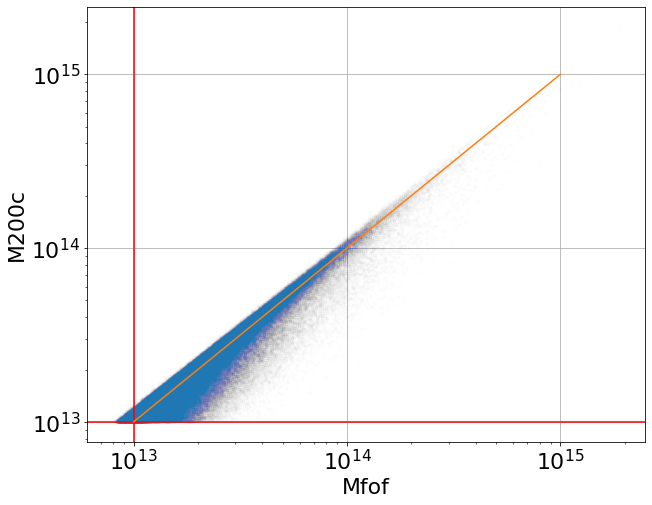

In [142]:
plt.loglog(tab["mass_fof"], tab["m200c"],'.',alpha=0.0025)
plt.xlabel('Mfof')
plt.ylabel('M200c')

plt.axvline(1e13, color='red')
plt.axhline(1e13, color='red')

plt.plot((1e13,1e15),(1e13,1e15))
plt.grid()

In [114]:
inds = np.zeros((len(halo_cat_bij)))

for i in range(len(halo_cat_bij)):
    if np.any((tab["halo_id"]==float(halo_cat_bij["id"][i]))):
        inds[i] = np.where(tab["halo_id"]==float(halo_cat_bij["id"][i]))[0][0]
    else:
        inds[i]=-9
    

In [210]:
M200c = np.append(tab["m200c"],np.nan)
ss_halo_id = np.append(tab["skysim_halo_id"],np.nan)

In [220]:
inds[np.argwhere(inds==-9)]=ss_halo_id.size-1

In [222]:
indices=[int(inds[i]) for i in range(len(halo_cat_bij))]

In [224]:
halo_cat_bij.data.add_column(M200c[indices], index=5,name='M200c')
halo_cat_bij.data.add_column(ss_halo_id[indices], index=6,name='skysim_halo_id')

In [225]:
halo_cat_bij_ss = ClCatalog(name='test', data=halo_cat_bij.data)

In [226]:
halo_cat_bij_ss.write('cosmoDC2_RM_match_cross_membership/halo_cat_bij_ss.fits', overwrite=True)

In [227]:
RM_cat_bij.write('cosmoDC2_RM_match_cross_membership/RM_cat_bij.fits', overwrite=True)